### CIFAR-10 Using Pytorch

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


import numpy as np

In [2]:
transform = transforms.ToTensor()

train_data = datasets.CIFAR10(root='../Data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='../Data', train=False, download=True, transform=transform)

Extracting ../Data/cifar-10-python.tar.gz to ../Data
Files already downloaded and verified


In [3]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [21]:
# torch.manual_seed(101)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [6]:
for images,labels in train_loader:
    break

In [7]:
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']

Label: [1 7 0 8 5 5 4 1 6 5 0 0 0 8 4 8 6 4 3 7 3 2 9 6 2 8 5 3 6 1 7 7 0 3 9 4 2
 4 2 6 3 0 1 4 4 4 2 9 0 3 2 9 5 6 0 3 7 2 5 8 7 4 3 5 2 0 2 7 5 2 4 3 6 7
 3 2 5 1 5 9 3 3 5 8 0 2 2 8 6 4 2 4 5 4 6 3 2 9 5 0 1 4 1 2 9 9 9 7 4 8 8
 0 2 6 0 8 0 4 2 0 2 4 2 5 1 7 9 2 4 8 4 0 2 9 6 2 7 4 4 9 2 1 0 5 2 7 2 6
 1 9 3 3 5 6 8 3 7 1 8 9 1 6 2 9 1 3 6 6 1 1 4 8 6 2 6 5 4 9 7 6 7 2 8 1 1
 5 9 3 2 9 2 4 8 9 6 1 2 7 2 1 6 0 6 5 2 6 3 2 6 0 9 0 7 1 9 7 4 2 5 4 8 6
 6 0 2 8 4 2 2 6 7 9 6 1 3 5 0 5 2 9 7 0 7 3 5 6 8 3 9 5 9 6 9 9 9 0]
Class:   car horse plane  ship   dog   dog  deer   car  frog   dog plane plane plane  ship  deer  ship  frog  deer   cat horse   cat  bird truck  frog  bird  ship   dog   cat  frog   car horse horse plane   cat truck  deer  bird  deer  bird  frog   cat plane   car  deer  deer  deer  bird truck plane   cat  bird truck   dog  frog plane   cat horse  bird   dog  ship horse  deer   cat   dog  bird plane  bird horse   dog  bird  deer   cat  frog horse   cat  bird   dog   ca

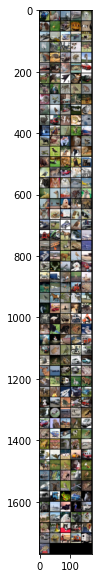

In [8]:
for images,labels in train_loader: 
    break

# Print the labels
print('Label:', labels.numpy())
print('Class:', *np.array([class_names[i] for i in labels]))

# Print the images
im = make_grid(images, nrow=5)  
plt.figure(figsize=(10,10))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [9]:
class convnet(nn.Module):
    
    def __init__(self):
        super().__init__()
        # input dims - (b,32,32,3)
        self.conv3_32 = nn.Conv2d(3, 32, 3, 1) # channels_in =3, # filters = 32 (3,3) stride =1
        self.conv32_32 = nn.Conv2d(32,32, 3, 1) # channels_in =16, # filters = 32 (3,3) stride =1
        self.pool = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
        self.drop_4 = nn.Dropout2d(p=0.4)
        self.conv32_64 = nn.Conv2d(32,64,3,1)
        self.conv64_64 = nn.Conv2d(64,64,3,1)
        self.fc1 = nn.Linear(5*5*64,512)
        self.drop_5 = nn.Dropout2d(p=0.5)
        self.fc2 = nn.Linear(512,10)
        
    
    def forward(self,X):
        
        X = F.relu(self.conv3_32(X)) # dims 32,32,3 c-> 30,30,32 
        X = F.relu(self.conv32_32(X)) # 30,30,32 c-> 28,28,32
        X = self.pool(X) # 15,15,32 
        X = self.drop_4(X)
        
        X = F.relu(self.conv32_64(X)) # 13,13,64
        X = F.relu(self.conv64_64(X)) # 11,11,64
        X = self.pool(X) # 5,5,64
        X = self.drop_4(X)
        
        X = X.view(-1,5*5*64)

        X = F.relu(self.fc1(X))
        X = self.drop_5(X)
        X = F.relu(self.fc2(X))
        
        return F.log_softmax(X, dim=1)

        
        
        
        
        
        

        

In [15]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)  # changed from (1, 6, 5, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(6*6*16, 120)   # changed from (4*4*16) to fit 32x32 images with 3x3 filters
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 6*6*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [16]:
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [17]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

In [18]:
count_parameters(model)

   162
     6
   864
    16
 69120
   120
 10080
    84
   840
    10
______
 81302


In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [22]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%1000 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/50000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed  

epoch:  0  batch: 1000 [ 10000/50000]  loss: 1.89164162  accuracy:  19.990%
epoch:  0  batch: 2000 [ 20000/50000]  loss: 1.96288300  accuracy:  24.840%
epoch:  0  batch: 3000 [ 30000/50000]  loss: 1.70142329  accuracy:  28.890%
epoch:  0  batch: 4000 [ 40000/50000]  loss: 1.66476595  accuracy:  31.883%
epoch:  0  batch: 5000 [ 50000/50000]  loss: 1.86574590  accuracy:  34.372%
epoch:  1  batch: 1000 [ 10000/50000]  loss: 1.21670413  accuracy:  46.000%
epoch:  1  batch: 2000 [ 20000/50000]  loss: 1.05400300  accuracy:  47.020%
epoch:  1  batch: 3000 [ 30000/50000]  loss: 1.29527164  accuracy:  47.450%
epoch:  1  batch: 4000 [ 40000/50000]  loss: 1.35281777  accuracy:  47.737%
epoch:  1  batch: 5000 [ 50000/50000]  loss: 1.83255422  accuracy:  48.104%
epoch:  2  batch: 1000 [ 10000/50000]  loss: 1.22697711  accuracy:  50.970%
epoch:  2  batch: 2000 [ 20000/50000]  loss: 1.57502091  accuracy:  51.580%
epoch:  2  batch: 3000 [ 30000/50000]  loss: 1.19532812  accuracy:  51.977%
epoch:  2  b

[tensor(17186),
 tensor(24052),
 tensor(26332),
 tensor(27845),
 tensor(28731),
 tensor(29424),
 tensor(30038),
 tensor(30577),
 tensor(31064),
 tensor(31495)]